In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
df= pd.read_csv("/workspaces/projects/Uber_Fare/uber.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,24238194,27835199,44984355,25894730,17610152,44470845,48725865,44195482,15822268,50611056
key,2015-05-07 19:52:06.0000003,2009-07-17 20:04:56.0000002,2009-08-24 21:45:00.00000061,2009-06-26 08:22:21.0000001,2014-08-28 17:47:00.000000188,2011-02-12 02:27:09.0000006,2014-10-12 07:04:00.0000002,2012-12-11 13:52:00.00000029,2012-02-17 09:32:00.00000043,2012-03-29 19:06:00.000000273
fare_amount,7.5,7.7,12.9,5.3,16.0,4.9,24.5,2.5,9.7,12.5
pickup_datetime,2015-05-07 19:52:06 UTC,2009-07-17 20:04:56 UTC,2009-08-24 21:45:00 UTC,2009-06-26 08:22:21 UTC,2014-08-28 17:47:00 UTC,2011-02-12 02:27:09 UTC,2014-10-12 07:04:00 UTC,2012-12-11 13:52:00 UTC,2012-02-17 09:32:00 UTC,2012-03-29 19:06:00 UTC
pickup_longitude,-73.999817,-73.994355,-74.005043,-73.976124,-73.925023,-73.969019,-73.961447,0.0,-73.975187,-74.001065
pickup_latitude,40.738354,40.728225,40.74077,40.790844,40.744085,40.75591,40.693965,0.0,40.745767,40.741787
dropoff_longitude,-73.999512,-73.99471,-73.962565,-73.965316,-73.973082,-73.969019,-73.871195,0.0,-74.00272,-73.96304
dropoff_latitude,40.723217,40.750325,40.772647,40.803349,40.761247,40.75591,40.774297,0.0,40.743537,40.775012
passenger_count,1,1,1,3,5,1,5,1,1,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [40]:
df = df.drop(['Unnamed: 0','key'],axis=1)
df.dropna(axis=0,inplace=True)

In [41]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['Year'] = df['pickup_datetime'].apply(lambda time: time.year)
df['Month'] = df['pickup_datetime'].apply(lambda time: time.month)
df['Day'] = df['pickup_datetime'].apply(lambda time: time.day)
df['Day of Week'] = df['pickup_datetime'].apply(lambda time: time.dayofweek)
df['Day of Week_num'] = df['pickup_datetime'].apply(lambda time: time.dayofweek)
df['Hour'] = df['pickup_datetime'].apply(lambda time: time.hour)
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(day_map)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,199999.0,11.359892,9.901760,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199999.0,-72.527631,11.437815,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,199999.0,39.935881,7.720558,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,199999.0,1.684543,1.385995,0.000000,1.000000,1.000000,2.000000,208.000000
Year,199999.0,2011.742434,1.856400,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
Month,199999.0,6.281791,3.438933,1.000000,3.000000,6.000000,9.000000,12.000000
Day,199999.0,15.704739,8.687377,1.000000,8.000000,16.000000,23.000000,31.000000
Day of Week_num,199999.0,3.048435,1.946946,0.000000,1.000000,3.000000,5.000000,6.000000


In [43]:
drop1 = df[(df['pickup_latitude'] > 90) | (df['pickup_latitude'] < -90)].index
drop2 = df[(df['dropoff_latitude'] > 90) | (df['dropoff_latitude'] < -90)].index
drop3 = df[(df['pickup_longitude'] > 180) | (df['pickup_longitude'] < -180)].index
drop4 = df[(df['dropoff_longitude'] > 180) | (df['dropoff_longitude'] < -180)].index

indices_to_drop = drop1.union(drop2).union(drop3).union(drop4)

df.drop(indices_to_drop, axis=0, inplace=True)
df.shape

(199987, 13)

In [44]:
drop5=df[df['fare_amount']<0].index
df.drop(drop5,axis=0,inplace=True)

In [45]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Day of Week_num,Hour
count,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000,199970.000000
mean,11.362259,-72.501661,39.917866,-72.511852,39.922164,1.684503,2011.742386,6.282037,15.705056,3.048422,13.491504
std,9.897210,10.450391,6.130667,10.411364,6.117273,1.385981,1.856355,3.438972,8.687549,1.946984,6.515409
min,0.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734793,-73.991407,40.733824,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967154,40.767157,-73.963657,40.768001,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


In [46]:
df['pickup_coordinates'] = list(zip(df['pickup_latitude'], df['pickup_longitude']))
df['dropoff_coordinates'] = list(zip(df['dropoff_latitude'], df['dropoff_longitude']))

In [47]:
from geopy.distance import geodesic
geodesic(df['pickup_coordinates'][0],df['dropoff_coordinates'][0]).kilometers

1.6811107421764293

In [48]:
def calculate_distance(row):
    return geodesic(row['pickup_coordinates'], row['dropoff_coordinates']).kilometers
df['distance']=df.apply(calculate_distance,axis=1)
df.head().T

,0,1,2,3,4
fare_amount,7.5,7.7,12.9,5.3,16.0
pickup_datetime,2015-05-07 19:52:06+00:00,2009-07-17 20:04:56+00:00,2009-08-24 21:45:00+00:00,2009-06-26 08:22:21+00:00,2014-08-28 17:47:00+00:00
pickup_longitude,-73.999817,-73.994355,-74.005043,-73.976124,-73.925023
pickup_latitude,40.738354,40.728225,40.74077,40.790844,40.744085
dropoff_longitude,-73.999512,-73.99471,-73.962565,-73.965316,-73.973082
dropoff_latitude,40.723217,40.750325,40.772647,40.803349,40.761247
passenger_count,1,1,1,3,5
Year,2015,2009,2009,2009,2014
Month,5,7,8,6,8
Day,7,17,24,26,28


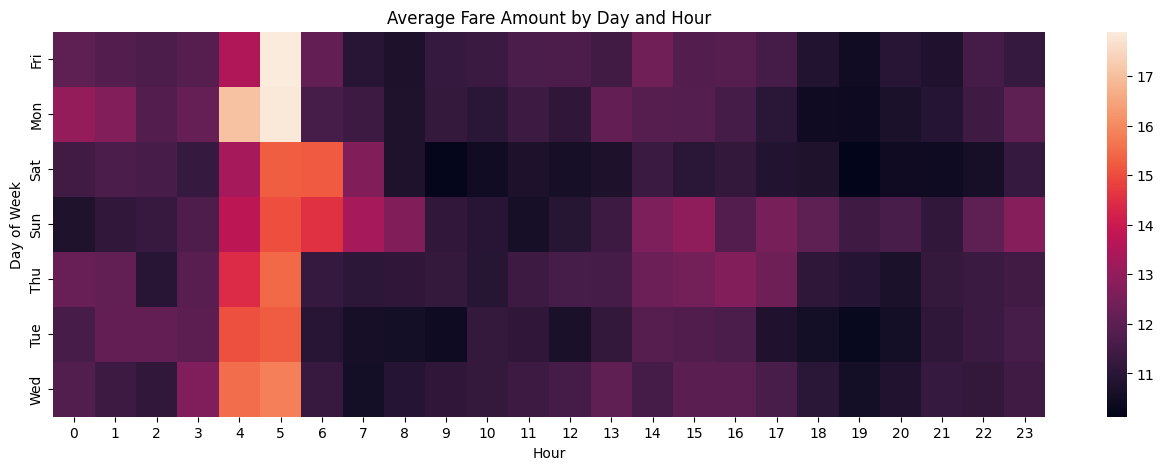

In [49]:
import seaborn as sns
fare_pivot = df.pivot_table(values='fare_amount', index='Day of Week', columns='Hour', aggfunc='mean')
plt.figure(figsize=(16, 5))
sns.heatmap(fare_pivot)
plt.title('Average Fare Amount by Day and Hour')
plt.show()

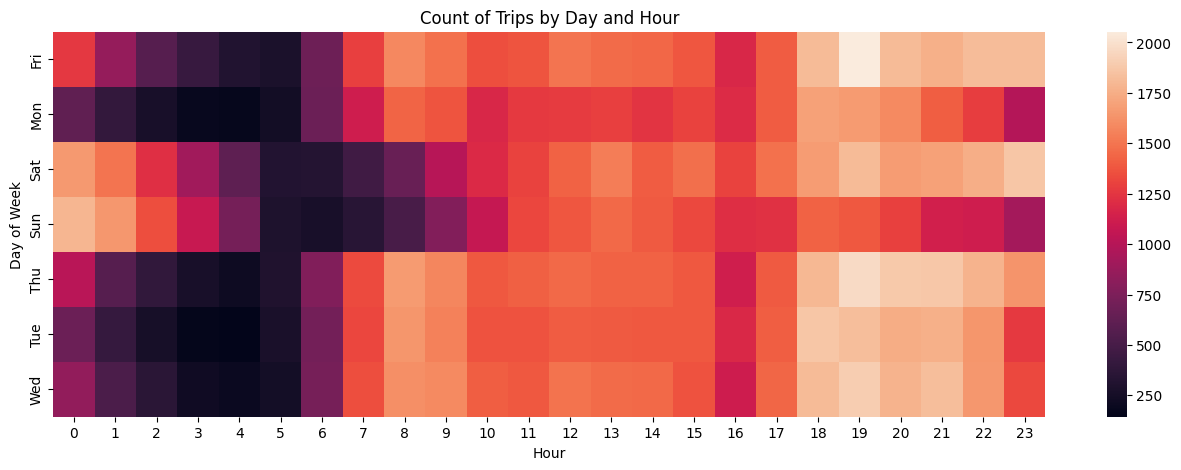

In [50]:
piv2= df.pivot_table(values='fare_amount',index='Day of Week',columns='Hour',aggfunc='count')
plt.figure(figsize=(16, 5))
sns.heatmap(piv2)
plt.title('Count of Trips by Day and Hour')
plt.show()


In [51]:
num = df.select_dtypes(include=['int64','float64'])

In [52]:
num.corr().style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Day of Week_num,Hour,distance
fare_amount,1.000000,0.011608,-0.011536,0.012071,-0.012446,0.010420,0.118495,0.023577,0.001360,0.007396,-0.021457,0.025492
pickup_longitude,0.011608,1.000000,-0.979048,0.949818,-0.936746,-0.000753,0.009744,-0.003584,0.005362,0.002309,0.001393,0.163780
pickup_latitude,-0.011536,-0.979048,1.000000,-0.936808,0.958249,-0.000526,-0.012044,0.004728,-0.008808,-0.004145,-0.001346,-0.142382
dropoff_longitude,0.012071,0.949818,-0.936808,1.000000,-0.979688,-0.000454,0.010261,-0.002152,0.004247,0.002276,0.000958,0.140089
dropoff_latitude,-0.012446,-0.936746,0.958249,-0.979688,1.000000,-0.001312,-0.012512,0.003564,-0.007817,-0.003916,-0.001303,-0.124062
passenger_count,0.010420,-0.000753,-0.000526,-0.000454,-0.001312,1.000000,0.004791,0.009828,0.003212,0.033200,0.013173,-0.001896
Year,0.118495,0.009744,-0.012044,0.010261,-0.012512,0.004791,1.000000,-0.115856,-0.012127,0.006095,0.002140,0.026655
Month,0.023577,-0.003584,0.004728,-0.002152,0.003564,0.009828,-0.115856,1.000000,-0.017361,-0.008818,-0.003920,-0.000693
Day,0.001360,0.005362,-0.008808,0.004247,-0.007817,0.003212,-0.012127,-0.017361,1.000000,0.005624,0.004680,-0.002063
Day of Week_num,0.007396,0.002309,-0.004145,0.002276,-0.003916,0.033200,0.006095,-0.008818,0.005624,1.000000,-0.086933,-0.004902


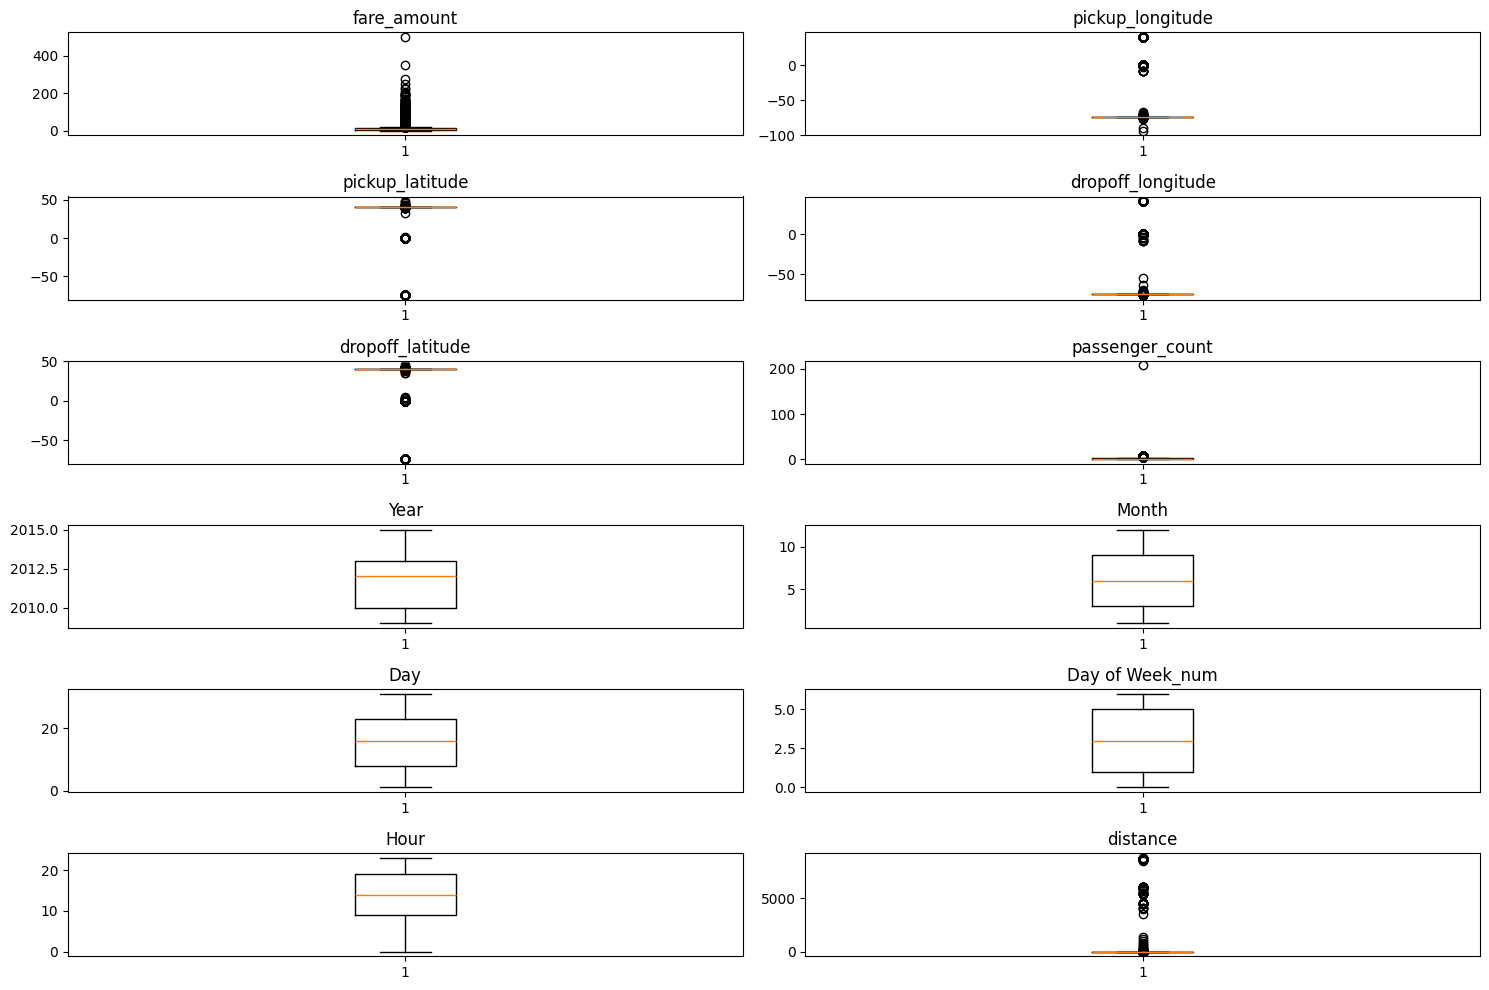

In [54]:
fig, axes = plt.subplots(6, 2, figsize=(15, 10))
cols = num.columns
axes=axes.flatten()
for i in range(len(cols)):
    axes[i].boxplot(num.iloc[:,i])
    axes[i].set_title(num.columns[i])
plt.tight_layout()
plt.show()

In [55]:
df.drop(['pickup_coordinates','dropoff_coordinates'],axis=1,inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Day of Week,Day of Week_num,Hour,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,Thu,3,19,1.681111
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,Fri,4,20,2.454363
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,Mon,0,21,5.039603
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,Fri,4,8,1.661442
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,Thu,3,17,4.483730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,Sun,6,10,0.112128
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,Fri,4,1,1.879635
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,Mon,0,0,12.867916
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,Wed,2,14,3.536552


In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [57]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [59]:
cat = df.select_dtypes(['object'])
cat_cols=cat.columns.to_list()
num_cols=X.select_dtypes(['int64','float64']).columns.to_list()
num_cols

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'Year',
 'Month',
 'Day',
 'Day of Week_num',
 'Hour',
 'distance']

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

In [61]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [62]:
predictions={}
for model_name, model in models.items():
    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred=pipeline.predict(X_test)
    predictions[model_name] = y_pred
    print(model_name)
    print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print()


Linear Regression
Mean Absolute Error:  5.988546284357358
Mean Squared Error:  104.5273960887439
RMSE: 10.223864048819502

Ridge Regression
Mean Absolute Error:  5.989419183460384
Mean Squared Error:  104.52722448917277
RMSE: 10.22385565670666

Lasso Regression
Mean Absolute Error:  6.041758263813396
Mean Squared Error:  105.73810413191362
RMSE: 10.282903487435522

Random Forest
Mean Absolute Error:  1.9965451072422769
Mean Squared Error:  28.169156852736734
RMSE: 5.307462374123507

Gradient Boosting
Mean Absolute Error:  2.1136974677806273
Mean Squared Error:  29.259073853598203
RMSE: 5.409165726209376



In [63]:
pipleline= Pipeline([('preprocessor',preprocessor),('regressor',GradientBoostingRegressor())])
pipleline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pickup_longitude',
                                                   'pickup_latitude',
                                                   'dropoff_longitude',
                                                   'dropoff_latitude',
                                                   'passenger_count', 'Year',
                                                   'Month', 'Day',
                                                   'Day of Week_num', 'Hour',
                                                   'distance']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Day of Week'])])),
                ('regressor', GradientBoostingRegressor())])

In [64]:
import joblib
joblib.dump(pipleline,'pipeline.joblib')

['pipeline.joblib']